<a href="https://colab.research.google.com/github/NadyaPutriAmalia/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS PRAKTIKUM**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.
Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.


In [2]:
from google.colab import drive

#Accesing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

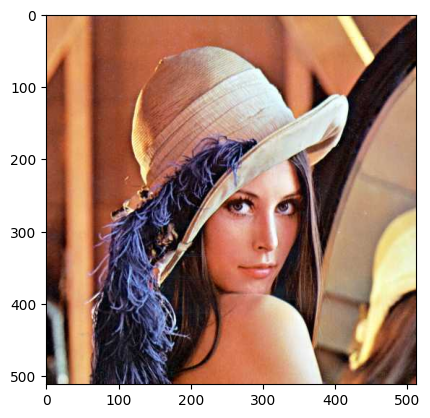

In [4]:
#Input image
original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
image = cv.cvtColor(original, cv.COLOR_BGR2RGB)
plt.imshow(image)

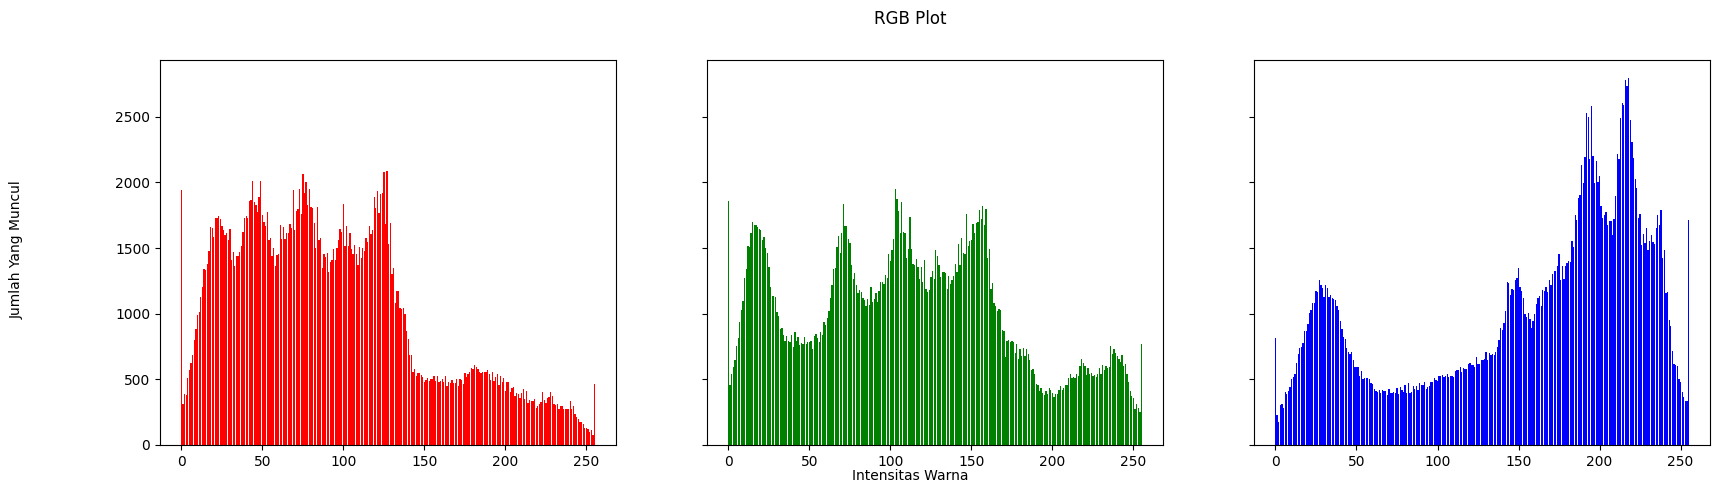

In [5]:
import cv2 as cv

# Inisialisasi array intensitas untuk setiap saluran warna
blue_intensity = [0] * 256
green_intensity = [0] * 256
red_intensity = [0] * 256

# Menghitung intensitas warna untuk setiap saluran warna
for channel in range(3):
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            intensity = image[y, x, channel]
            if channel == 0:
                blue_intensity[intensity] += 1
            elif channel == 1:
                green_intensity[intensity] += 1
            elif channel == 2:
                red_intensity[intensity] += 1

# Range intensitas warna
color_range = np.arange(256)

# Buat plot histogram untuk masing-masing saluran warna
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('RGB Plot')
fig.text(0.05, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(color_range, red_intensity, color='red')
axs[1].bar(color_range, green_intensity, color='green')
axs[2].bar(color_range, blue_intensity, color='blue')

plt.show()

**HASIL ANALISA**


1. Inisialisasi Array Intensitas: Tiga array `blue_intensity`, `green_intensity`, dan `red_intensity` diinisialisasi dengan panjang 256, yang akan digunakan untuk menghitung jumlah kemunculan intensitas warna pada masing-masing saluran warna (biru, hijau, merah). Setiap elemen array ini akan merepresentasikan jumlah piksel dalam citra dengan intensitas warna yang sesuai.

2. Loop untuk Menghitung Intensitas Warna dengan menggunakan loop nested (bertingkat) yang digunakan untuk menghitung intensitas warna untuk setiap saluran warna (biru, hijau, merah). Loop pertama adalah loop `for channel in range(3):`, yang akan melakukan perulangan tiga kali, sesuai dengan jumlah saluran warna dalam citra RGB. Di dalam loop ini, terdapat dua loop tambahan yang digunakan untuk melintasi setiap piksel dalam citra.

   - `intensity = image[y, x, channel]`: Ini mengambil nilai intensitas warna pada koordinat `(x, y)` dari saluran warna yang sedang diproses saat itu (sesuai dengan nilai `channel`).
   
   - Dalam blok `if`, nilai `intensity` ditambahkan ke array intensitas yang sesuai dengan saluran warna. Misalnya, jika `channel` adalah 0 (saluran biru), maka `intensity` ditambahkan ke `blue_intensity`.

3. `color_range = np.arange(256)`untuk menginisialisasi array `color_range` yang berisi nilai dari 0 hingga 255

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

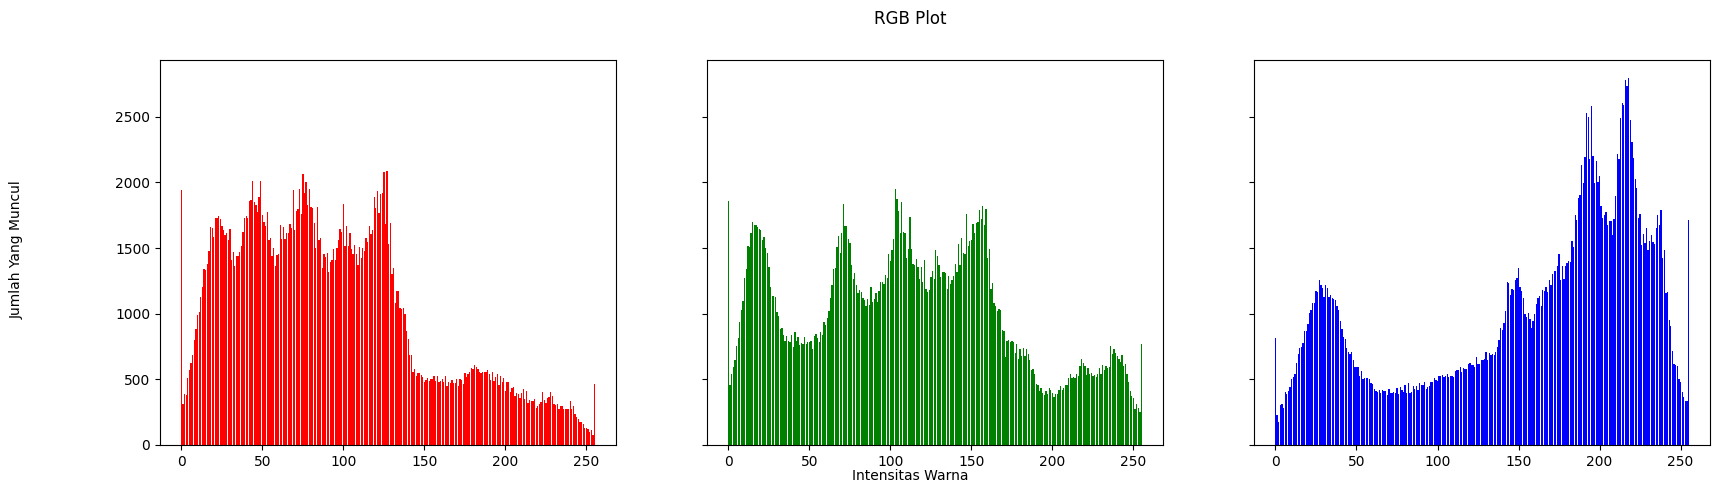

In [6]:
import numpy as np
import cv2 as cv

# Menghitung intensitas warna untuk setiap saluran warna
for channel in range(3):
    # Pilih saluran warna yang sesuai
    channel_image = image[:, :, channel]

    # Menggunakan NumPy histogram untuk menghitung histogram
    hist, bin_edges = np.histogram(channel_image, bins=256, range=(0, 256))

    # Menyimpan hasil histogram ke dalam array intensitas yang sesuai
    if channel == 0:
        blue_intensity = hist
    elif channel == 1:
        green_intensity = hist
    elif channel == 2:
        red_intensity = hist

# Range intensitas warna
color_range = np.arange(256)

# Buat plot histogram untuk masing-masing saluran warna
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('RGB Plot')
fig.text(0.05, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(color_range, red_intensity, color='red')
axs[1].bar(color_range, green_intensity, color='green')
axs[2].bar(color_range, blue_intensity, color='blue')

plt.show()

**Hasil Analisis**


1. Inisialisasi tiga array intensitas (`blue_intensity`, `green_intensity`, `red_intensity`) dengan panjang 256, yang akan digunakan untuk menyimpan hasil perhitungan histogram untuk masing-masing saluran warna.

2. Selanjutnya, melakukan perulangan `for` dari 0 hingga 2 (3 kali) untuk mewakili saluran warna (biru, hijau, merah).

3. Di dalam loop, kita memilih saluran warna yang sesuai dari citra dengan menggunakan `channel_image = image[:, :, channel]`.

4. Kemudian, menggunakan `np.histogram()` untuk menghitung histogram dari `channel_image` dengan membaginya menjadi 256 bin dan rentang intensitas warna antara 0 hingga 255. Hasil histogram disimpan dalam `hist` dan batasan bin disimpan dalam `bin_edges`.

5. Selanjutnya, menyimpan hasil histogram yang dihitung ke dalam array intensitas yang sesuai berdasarkan saluran warna. Misalnya, jika `channel` adalah 0, menyimpan hasilnya dalam `blue_intensity`.

6. Setelah perhitungan histogram selesai untuk semua saluran warna, membuat range intensitas warna dari 0 hingga 255 dengan `color_range`.

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [7]:
# Import image
image2 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

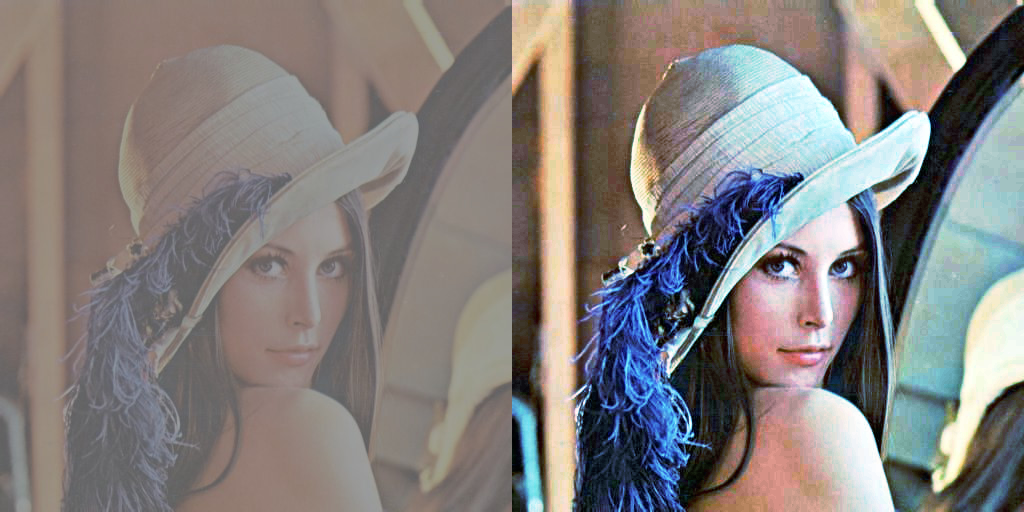

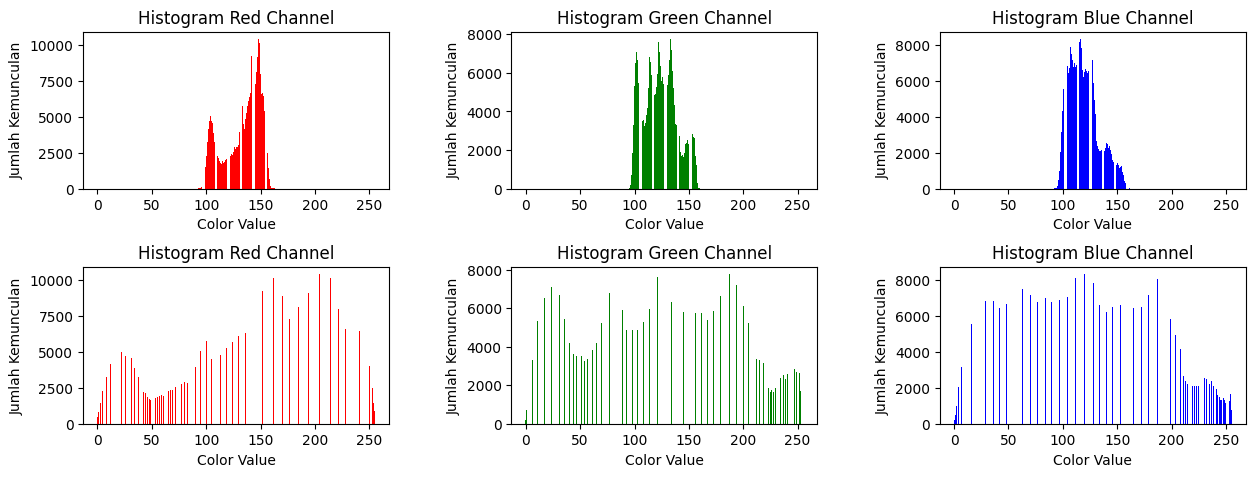

In [9]:
# akses per pixel dari frekuensi
def getFrequency(image, frequency):
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      frequency[image[y, x]] += 1
  return frequency

# normalisasi
def getEqualizationHistogram(normalized):
  equalized_value = [0] * 256
  for i in range(256):
    equalized_value[i] = round(normalized[i] * 255)
  return equalized_value

#Rumus K0
def createNewImage(image, equalized_array):
  new_image = np.zeros(image.shape, image.dtype)
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      new_image[y, x] = equalized_array[image[y, x]]
  return new_image

# Histogram equalization
def createBarPlot(intensity, color):
  plt.bar(color_range, intensity, color = color)
  plt.title('Histogram ' + color + ' Channel')
  plt.xlabel('Color Value'); plt.ylabel('Jumlah Kemunculan')

# Pemisah channel
(B, G, R) = cv.split(image2)

# frekuensi
frequency_red = getFrequency(R, [0] * 256)
frequency_green = getFrequency(G, [0] * 256)
frequency_blue = getFrequency(B, [0] * 256)

# Kumulatif Frekuensi
cumsum_red = np.cumsum(frequency_red)
cumsum_green = np.cumsum(frequency_green)
cumsum_blue = np.cumsum(frequency_blue)

# Normalize Frequensi
normalized_red = cumsum_red / np.sum(frequency_red)
normalized_green = cumsum_green / np.sum(frequency_green)
normalized_blue = cumsum_blue / np.sum(frequency_blue)

# Equalization histogram
equalized_red = getEqualizationHistogram(normalized_red)
equalized_green = getEqualizationHistogram(normalized_green)
equalized_blue = getEqualizationHistogram(normalized_blue)

# Create new image
new_image_red = createNewImage(R, equalized_red)
new_image_green = createNewImage(G, equalized_green)
new_image_blue = createNewImage(B, equalized_blue)
new_image = cv.merge((new_image_blue, new_image_green, new_image_red))

# Show image
final_frame = cv.hconcat((image2, new_image))
cv2_imshow(final_frame)

# Show plot
plt.figure(figsize=(15,4))
plt.subplot(2,3,1)
createBarPlot(frequency_red, 'Red')
plt.subplot(2,3,2)
createBarPlot(frequency_green, 'Green')
plt.subplot(2,3,3)
createBarPlot(frequency_blue, 'Blue')
plt.subplot(2,3,4)
createBarPlot(getFrequency(new_image_red, [0] * 256), 'Red')
plt.subplot(2,3,5)
createBarPlot(getFrequency(new_image_green, [0] * 256), 'Green')
plt.subplot(2,3,6)
createBarPlot(getFrequency(new_image_blue, [0] * 256), 'Blue')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama

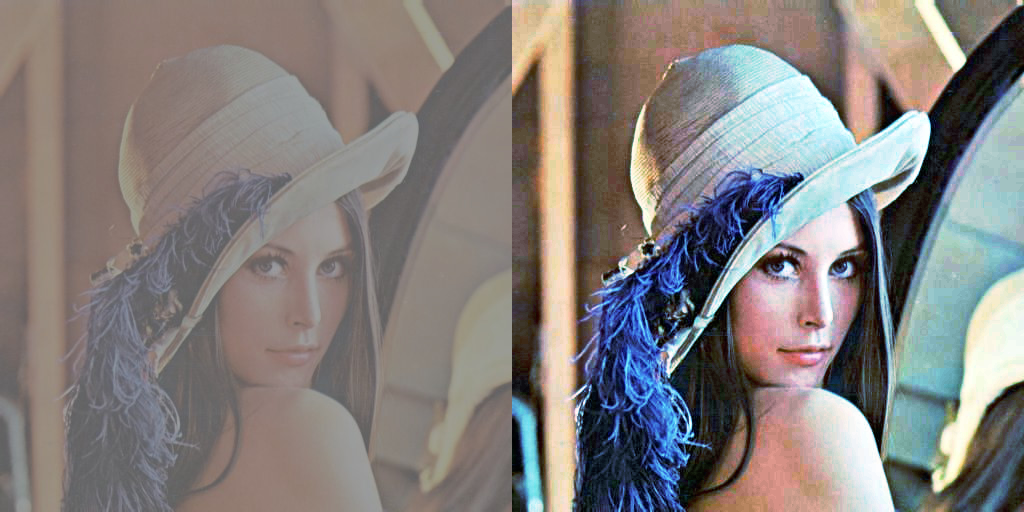

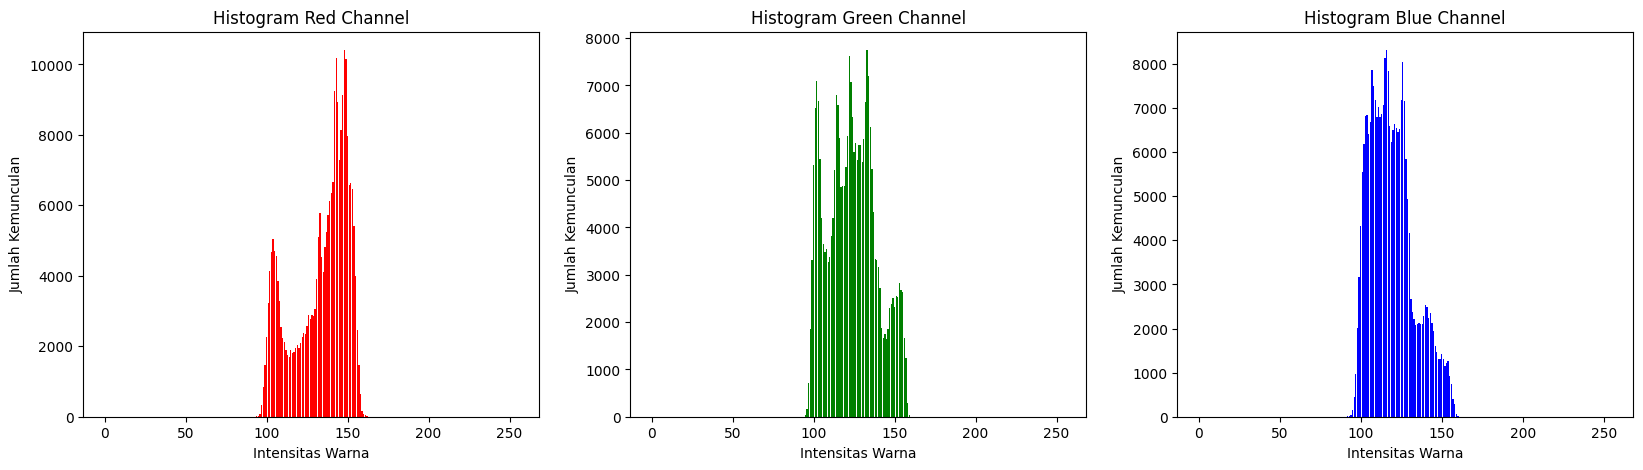

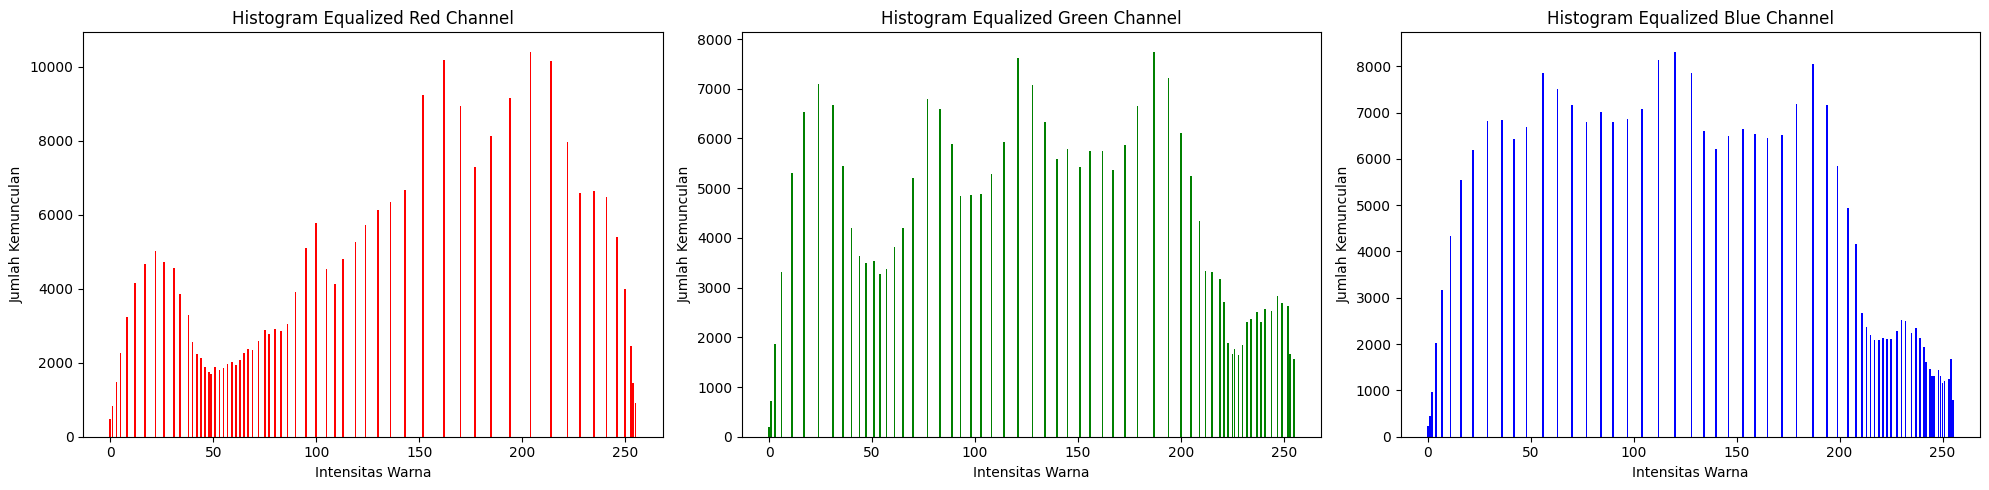

In [32]:
equalized_image = np.zeros(image2.shape, image2.dtype)

b, g, r = cv.split(image2)
red = cv.equalizeHist(r)
green = cv.equalizeHist(g)
blue = cv.equalizeHist(b)
equalized_image = cv.merge((blue, green, red))

# Menghitung histogram untuk setiap saluran warna
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Menghitung histogram untuk citra hasil ekualisasi
hist_equalized_b = cv2.calcHist([blue], [0], None, [256], [0, 256])
hist_equalized_g = cv2.calcHist([green], [0], None, [256], [0, 256])
hist_equalized_r = cv2.calcHist([red], [0], None, [256], [0, 256])

# Menampilkan citra asli dan citra hasil ekualisasi histogram
final_frame = cv.hconcat((image2, equalized_image))
cv2_imshow(final_frame)

# Fungsi untuk membuat plot histogram
def createBarPlot(intensity, color, title):
    color_range = np.arange(256)
    plt.bar(color_range, intensity.ravel(), color=color)
    plt.title(title)
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

# Membuat plot histogram untuk masing-masing saluran warna
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
createBarPlot(hist_r, 'red', 'Histogram Red Channel')
plt.subplot(1, 3, 2)
createBarPlot(hist_g, 'green', 'Histogram Green Channel')
plt.subplot(1, 3, 3)
createBarPlot(hist_b, 'blue', 'Histogram Blue Channel')

# Membuat plot histogram untuk citra hasil ekualisasi
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
createBarPlot(hist_equalized_r, 'red', 'Histogram Equalized Red Channel')
plt.subplot(1, 3, 2)
createBarPlot(hist_equalized_g, 'green', 'Histogram Equalized Green Channel')
plt.subplot(1, 3, 3)
createBarPlot(hist_equalized_b, 'blue', 'Histogram Equalized Blue Channel')
plt.tight_layout()
plt.show()

**Hasil Analisis**

1. Citra kemudian dipisahkan menjadi tiga saluran warna: merah (red), hijau (green), dan biru (blue) menggunakan fungsi `cv2.split()`.

2. Setiap saluran warna (merah, hijau, dan biru) diekualisasi histogramnya menggunakan fungsi `cv2.equalizeHist()`. Hasil ekualisasi disimpan dalam variabel `red`, `green`, dan `blue`.

3. Saluran warna yang telah diekualisasi digabungkan kembali untuk membentuk citra hasil ekualisasi. Citra ini disimpan dalam variabel `equalized_image` dengan menggunakan `cv2.merge()`.

4. Histogram untuk setiap saluran warna (merah, hijau, dan biru) sebelum ekualisasi dihitung menggunakan `cv2.calcHist()` dan disimpan dalam variabel `hist_r`, `hist_g`, dan `hist_b`.

5. Histogram untuk setiap saluran warna setelah ekualisasi dihitung juga menggunakan `cv2.calcHist()` dan disimpan dalam variabel `hist_equalized_r`, `hist_equalized_g`, dan `hist_equalized_b`.

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)


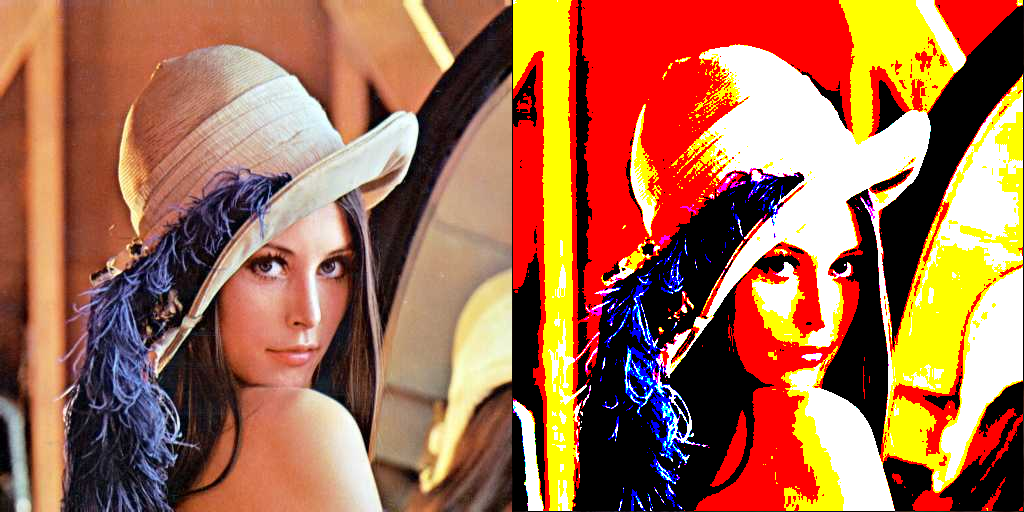

In [ ]:
def threshold(color):
  if color > 255:
    return 255
  elif color < 0:
    return 0
  else:
    return color

original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

(B, G, R) = cv.split(original)
img_pixel_blue = np.zeros(B.shape, B.dtype)
img_pixel_green = np.zeros(G.shape, G.dtype)
img_pixel_red = np.zeros(R.shape, R.dtype)

for y in range(0, R.shape[0] - 1):
  for x in range(1, R.shape[1] - 1):
    pixel_blue_old = B[y, x]
    pixel_green_old = G[y, x]
    pixel_red_old = R[y, x]
    pixel_distance = 1

    pixel_blue_new = np.round(pixel_distance * pixel_blue_old / 255) * (255 / pixel_distance)
    pixel_green_new = np.round(pixel_distance * pixel_green_old / 255) * (255 / pixel_distance)
    pixel_red_new = np.round(pixel_distance * pixel_red_old / 255) * (255 / pixel_distance)

    img_pixel_blue[y, x] = pixel_blue_new
    img_pixel_green[y, x] = pixel_green_new
    img_pixel_red[y, x] = pixel_red_new

    error_blue = pixel_blue_old - pixel_blue_new
    error_green = pixel_green_old - pixel_green_new
    error_red = pixel_red_old - pixel_red_new

    img_pixel_blue[y, x + 1] = threshold(img_pixel_blue[y, x + 1] + error_blue * 7/16)
    img_pixel_green[y, x + 1] = threshold(img_pixel_green[y, x + 1] + error_green * 7/16)
    img_pixel_red[y, x + 1] = threshold(img_pixel_red[y, x + 1] + error_red * 7/16)

    img_pixel_blue[y + 1, x - 1] = threshold(img_pixel_blue[y + 1, x - 1] + error_blue * 3/16)
    img_pixel_green[y + 1, x - 1] = threshold(img_pixel_green[y + 1, x - 1] + error_green * 3/16)
    img_pixel_red[y + 1, x - 1] = threshold(img_pixel_red[y + 1, x - 1] + error_red * 3/16)

    img_pixel_blue[y + 1, x] = threshold(img_pixel_blue[y + 1, x] + error_blue * 5/16)
    img_pixel_green[y + 1, x] = threshold(img_pixel_green[y + 1, x] + error_green * 5/16)
    img_pixel_red[y + 1, x] = threshold(img_pixel_red[y + 1, x] + error_red * 5/16)

    img_pixel_blue[y + 1, x + 1] = threshold(img_pixel_blue[y + 1, x + 1] + error_blue * 1/16)
    img_pixel_green[y + 1, x + 1] = threshold(img_pixel_green[y + 1, x + 1] + error_green * 1/16)
    img_pixel_red[y + 1, x + 1] = threshold(img_pixel_red[y + 1, x + 1] + error_red * 1/16)

new_image = cv.merge((img_pixel_blue, img_pixel_green, img_pixel_red))

final_frame = cv.hconcat((original, new_image))
cv2_imshow(final_frame)

**Hasil Analisis**

1. Citra asli dibagi menjadi tiga saluran warna: biru (B), hijau (G), dan merah (R) menggunakan fungsi `cv2.split()`. Setiap saluran warna diambil terpisah dan disimpan dalam variabel `b`, `g`, dan `r`.

2. Histogram equalization dilakukan untuk setiap saluran warna (B, G, R) secara terpisah menggunakan fungsi `cv2.equalizeHist()`. Hasil ekualisasi histogram untuk masing-masing saluran warna disimpan dalam variabel `equalized_b`, `equalized_g`, dan `equalized_r`.

3. Hasil ekualisasi histogram untuk masing-masing saluran warna digabungkan kembali untuk membentuk citra hasil ekualisasi histogram. Ini dilakukan dengan menggunakan fungsi `cv2.merge()` untuk menggabungkan saluran warna yang telah diekualisasi.

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

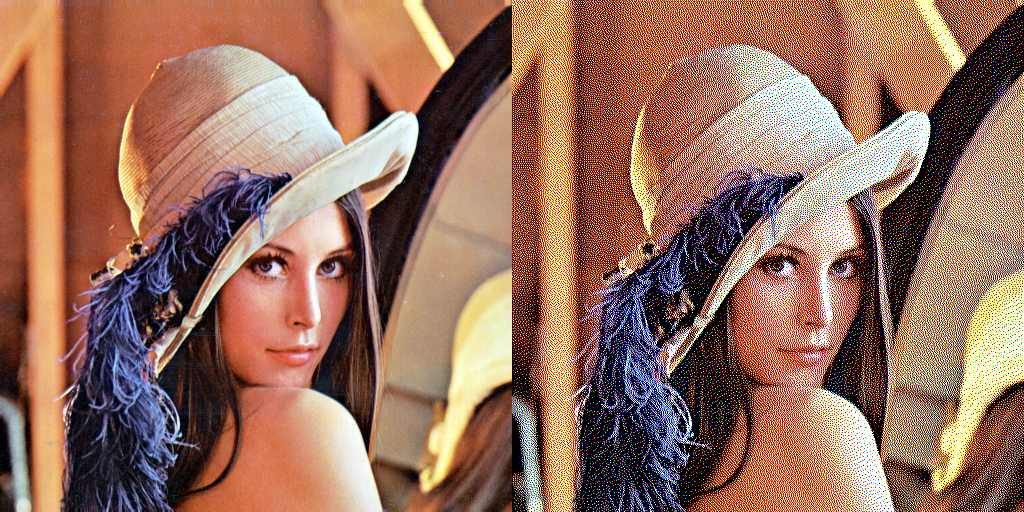

In [ ]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
b, g, r = cv.split(image)

# menerapkan dithering ke chanel
for channel in [b, g, r]:
    height, width = channel.shape

    # inisialisasi image
    new_channel = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_value = channel[y, x]
            new_value = 0

            if old_value > 128:
                new_value = 255

            channel[y, x] = new_value

            error = old_value - new_value

            if x < width - 1:
                new_number = channel[y, x + 1] + error * 7 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y, x + 1] = new_number

            if x > 0 and y < height - 1:
                new_number = channel[y + 1, x - 1] + error * 3 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x - 1] = new_number

            if y < height - 1:
                new_number = channel[y + 1, x] + error * 5 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x] = new_number

            if y < height - 1 and x < width - 1:
                new_number = channel[y + 1, x + 1] + error * 1 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x + 1] = new_number

    # Store dithered channel in new image
    new_channel = channel

# Merge channels into final image
new_image = cv.merge([b, g, r])

# Display original and dithered images

final_frame = cv.hconcat((image, new_image))
cv2_imshow(final_frame)

**Hasil Analisis**

1. Saluran warna biru (B), hijau (G), dan merah (R) dipecah menjadi tiga saluran warna terpisah.

2. Untuk setiap saluran warna (biru, hijau, dan merah), kita membuat citra baru yang akan menjadi hasil dari proses dithering, yaitu `img_pixel_blue`, `img_pixel_green`, dan `img_pixel_red`. Citra-citra ini diinisialisasi dengan ukuran yang sama seperti citra asli dan tipe data `np.uint8`.

3. Dilakukan iterasi melalui setiap piksel dalam citra asli (saluran warna) menggunakan dua loop bersarang, satu untuk mengakses koordinat y (tinggi) dan satu lagi untuk koordinat x (lebar).

4. Untuk setiap piksel dalam saluran warna (channel), kita menghitung nilai piksel baru (new_value) berdasarkan ambang batas tertentu. Dalam hal ini, jika nilai piksel asli (old_value) lebih besar dari 128, maka nilai baru diatur menjadi 255 (putih); jika tidak, diatur menjadi 0 (hitam).

5. Selanjutnya, kita menghitung error antara nilai piksel asli dan nilai baru yang telah dihitung sebelumnya. Error ini akan digunakan untuk mendistribusikan kesalahan ke piksel-piksel tetangga.

6. Dilakukan distribusi kesalahan ke piksel-piksel tetangga berdasarkan bobot tertentu yang didefinisikan dalam algoritma Floyd-Steinberg. Ini mencakup piksel yang berada di sebelah kanan, bawah kiri, bawah, dan bawah kanan dari piksel saat ini.

7. Untuk setiap piksel tetangga yang menerima distribusi kesalahan, kita menghitung nilai baru untuk piksel tersebut berdasarkan error yang telah dihitung sebelumnya. Kita juga memastikan bahwa nilai piksel tersebut berada dalam rentang 0 hingga 255 menggunakan fungsi `threshold`.

8. Proses di atas diulangi untuk setiap piksel dalam citra asli, sehingga kesalahan didistribusikan secara iteratif.

9. Setelah proses dithering selesai untuk semua piksel dalam saluran warna, citra hasil dithering untuk saluran tersebut disimpan dalam citra baru yang telah diinisialisasi sebelumnya.

10. Terakhir, citra hasil dithering untuk saluran warna biru, hijau, dan merah digabungkan kembali untuk membentuk citra hasil akhir menggunakan `cv.merge`.

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

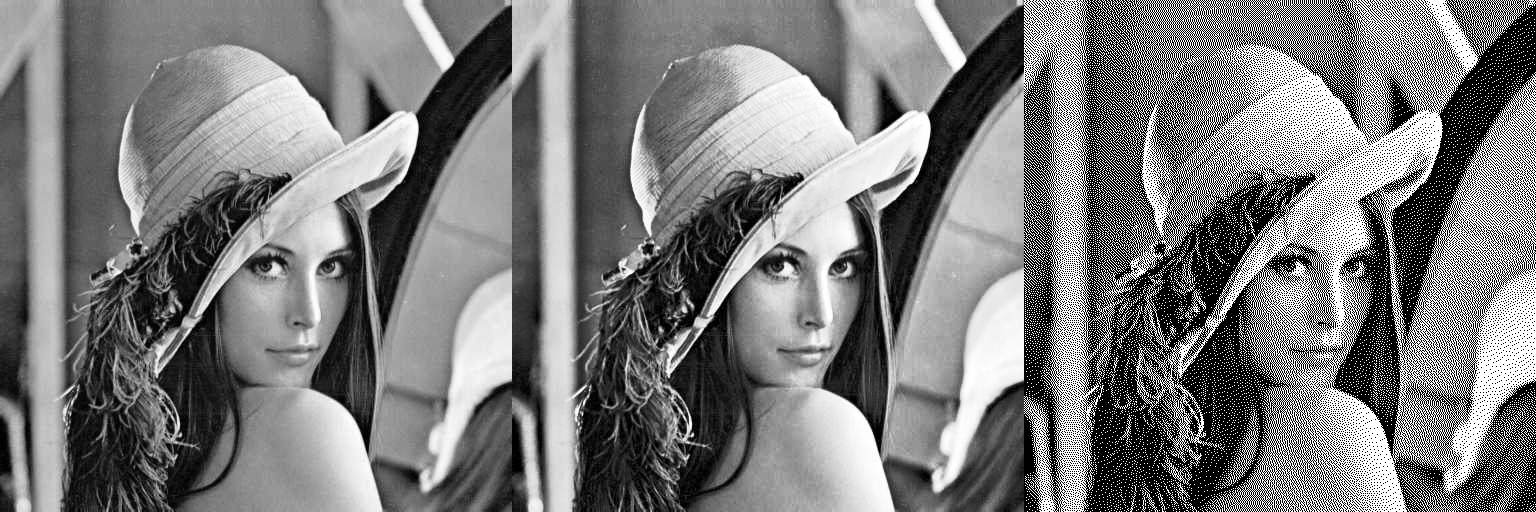

In [37]:
from PIL import Image
import cv2

Image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

FloydSteinberg = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)

def histog(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            pixel = img[y, x]
            hist[pixel] += 1
    return hist

def equalize_histogram(img):
    height, width = img.shape #Mengambil dimensi gambar untuk digunakan pada iterasi berikutnya.
    hist = histog(img)
    cdf = np.cumsum(hist)#Menghitung kumulatif histogram.
    cdf_normalized = cdf / (height*width)#Normalisasi kumulatif histogram dengan membaginya dengan jumlah pixel pada gambar.
    transform_map = np.floor(255 * cdf_normalized).astype(np.uint8)#Membuat peta transformasi dengan memetakan nilai piksel pada gambar yang lama ke nilai piksel yang baru.
    img_eq = np.zeros((height, width), dtype=np.uint8) #Membuat gambar baru yang akan menampung gambar hasil ekualisasi histogram.
    for y in range(height):# Iterasi pada setiap piksel pada gambar lama, kemudian mengganti nilai piksel tersebut pada gambar baru dengan menggunakan nilai piksel yang baru pada peta transformasi.
        for x in range(width):
            img_eq[y, x] = transform_map[img[y, x]]
    return img_eq


# implementasikan proses dithering Floyd and Steinberg
Height = FloydSteinberg.shape[0]
Width = FloydSteinberg.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = FloydSteinberg[y, x]
        new_value = 0
        if (old_value > 128) : #jika nilai old_value lebih besar dari 128, new_value akan diatur sebagai 255
            new_value = 255

        FloydSteinberg[y, x] = new_value

        Error = old_value - new_value
        #Pada setiap piksel tersebut, nilai piksel dihitung kembali dengan memperhatikan error dari piksel sebelumnya dan koefisien tertentu (7/16, 3/16, 5/16, dan 1/16) yang sudah ditentukan.
        if (x<Width-1): #piksel bukan berada di tepi kanan gambar dan langkah selanjutnya akan dilakukan untuk piksel di sebelah kanan.
            NewNumber = FloydSteinberg[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y, x+1] = NewNumber

        if (x>0 and y<Height-1):#piksel tidak berada di tepi kiri atau bawah gambar dan langkah selanjutnya akan dilakukan untuk piksel di sudut kiri bawah.
            NewNumber = FloydSteinberg[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x-1] = NewNumber

        if (y<Height-1): #piksel tidak berada di tepi bawah gambar dan langkah selanjutnya akan dilakukan untuk piksel di bawah.
            NewNumber= FloydSteinberg[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1): #piksel tidak berada di tepi kanan atau bawah gambar dan langkah selanjutnya akan dilakukan untuk piksel di sudut kanan bawah.
            NewNumber = FloydSteinberg[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x+1] = NewNumber


img_gray = cv.cvtColor(Image, cv.COLOR_BGR2GRAY)
img_eq = equalize_histogram(img_gray)

final_frame = cv.hconcat((img_gray, img_eq, FloydSteinberg))
cv2_imshow(final_frame)